In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics, svm,decomposition

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
x_train, y_train, traininglabels = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000,)

In [8]:
traininglabels.shape

(50000, 10)

In [9]:
x_test, y_test, testinglabels = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [10]:
x_train[0].shape

(32, 32, 3)

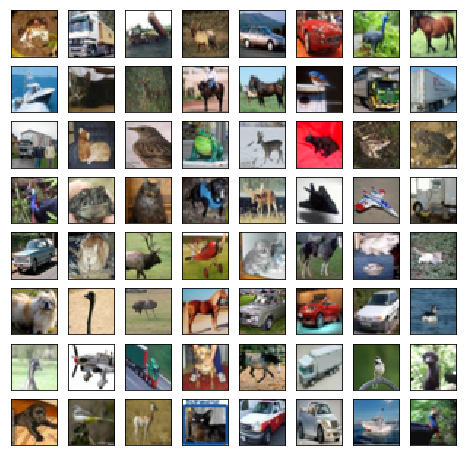

In [11]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap = "gray")
plt.show()

In [12]:
x_train = x_train.flatten()

In [13]:
x_train = x_train.reshape((50000,32*32*3))
x_train.shape

(50000, 3072)

In [14]:
# Flatenning x_test also
x_test = x_test.flatten()
x_test = x_test.reshape((10000,32*32*3))


In [15]:
pca = decomposition.PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.explained_variance_ratio_.shape

(217,)

In [24]:
k = 0
total = 0
while total < 0.95:
    total = total + pca.explained_variance_ratio_[k]
    k = k + 1
k

217

In [17]:
pca = decomposition.PCA(n_components=k, whiten = True).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [18]:
x_train_pca.shape, x_test_pca.shape

((50000, 217), (10000, 217))

In [19]:
clf = svm.SVC(kernel="rbf")
clf = clf.fit(x_train_pca, y_train)

In [20]:
y_test_pred = clf.predict(x_test_pca)

In [21]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[593,  36,  53,  26,  23,  16,  18,  21, 137,  77],
       [ 30, 682,  11,  24,   9,  11,  15,  19,  33, 166],
       [ 70,  26, 416,  90, 110,  72, 109,  52,  22,  33],
       [ 17,  32,  97, 425,  60, 157,  99,  35,  17,  61],
       [ 38,  13, 130,  89, 455,  70,  98,  74,  19,  14],
       [ 16,  20,  85, 198,  69, 460,  50,  62,  15,  25],
       [  9,  21,  68,  95,  73,  47, 622,  23,  11,  31],
       [ 19,  21,  47,  64,  75,  91,  16, 590,  16,  61],
       [111,  64,  17,  26,  15,  19,  13,   6, 664,  65],
       [ 45, 159,   7,  25,   8,  18,  24,  29,  49, 636]])

In [23]:
print(metrics.classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.63      0.59      0.61      1000
          1       0.64      0.68      0.66      1000
          2       0.45      0.42      0.43      1000
          3       0.40      0.42      0.41      1000
          4       0.51      0.46      0.48      1000
          5       0.48      0.46      0.47      1000
          6       0.58      0.62      0.60      1000
          7       0.65      0.59      0.62      1000
          8       0.68      0.66      0.67      1000
          9       0.54      0.64      0.59      1000

avg / total       0.55      0.55      0.55     10000

